In [16]:
import numpy as np
import matplotlib.pyplot as plt

# reads data from txt file
#data : time,Temp,DAC,current

def plotGraph(file, after, lab):
    contents = []

    with open(file, "rt") as cont:
        for line in cont:
            element = line.split(",") # splits up into values
            element[3] = element[3][:-2] # cuts off the '\n' from last value
            contents.append(element)

    start = float(contents[0][0]) # staring time
    datapointsx = []
    datapointsy = []

    for i in range(0, len(contents)):
        datapointsx.append(float(contents[i][0])-start)
        datapointsy.append(float(contents[i][1]))

    trimIndex = trim(datapointsx, after)

    datapointsx = datapointsx[trimIndex:]
    datapointsy = datapointsy[trimIndex:]

    start = datapointsx[0]

    #shifts time to 0 again
    for i in range(0, len(datapointsx)):
        datapointsx[i] -= start

    plt.plot(datapointsx, datapointsy, label = lab)
    

def trim(timesArr, after):
    # returns index of time array when the time is after (or equal to) the time 'after'
    # example: timesArr = [0, 1, 2, 3, 4] and after = 2.5: returns 3
    i = 0
    while (timesArr[i] < after):
        i += 1

    return i

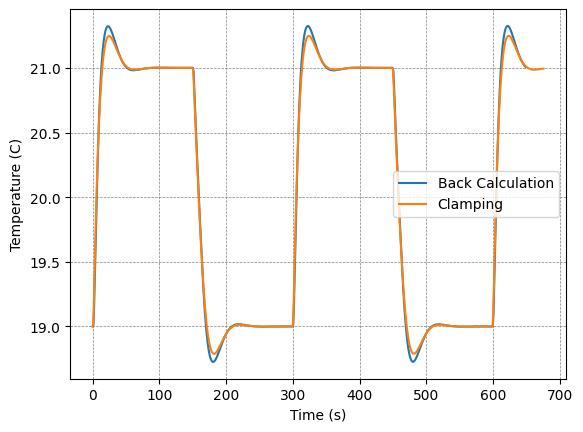

In [17]:
file1 = "backcalc.txt" #starts at 167.87
file2 = "actualclamp.txt" #171.393
file3 = "noantiwindup.txt" #179.385

plotGraph(file1, 167.87, "Back Calculation")
plotGraph(file2, 171.393, "Clamping")
#plotGraph(file3, 179.385, "No Antiwindup")

plt.grid(True, color='gray', linewidth=0.5, linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()